# Support Vector Machines (SVM) Tutorial
This notebook introduces SVMs, including linear and RBF kernels. It also shows how to train, visualize decision boundaries, and experiment with SVM hyperparameters.

### Steps Covered:
1. Linear SVM
2. Non-linear dataset with RBF Kernel
3. Experimentation with parameters.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

## Step 1: Training a Linear SVM on a Simple Dataset
We start with a simple linearly separable dataset generated by `make_blobs` function(sklearn). A linear SVM will be trained on this dataset.

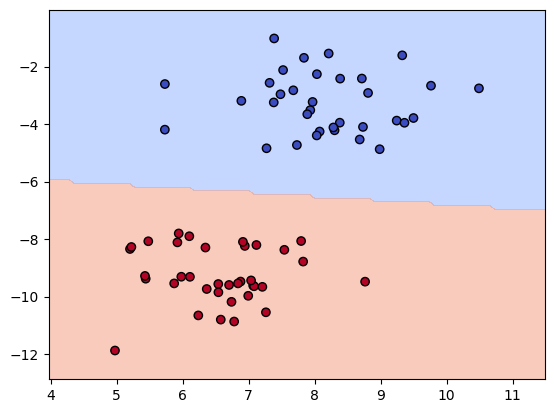

In [2]:
# Generate a simple dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Linear SVM
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)

# Plot the decision boundary
def plot_decision_boundary(clf, X, y):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                         np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z > 0, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.show()

plot_decision_boundary(clf, X_train, y_train)

### Experiment:
- Change `C` in `SVC(kernel='linear', C=1)` to observe how the decision boundary adapts.
- Higher `C` makes the model stricter on minimizing misclassification. Lower `C` allows for a softer margin.

## Step 2: Non-linear Dataset with RBF Kernel
Now, let's work with a more complicated dataset generated using `make_circles`. This dataset is non-linearly separable, so we need an RBF kernel.

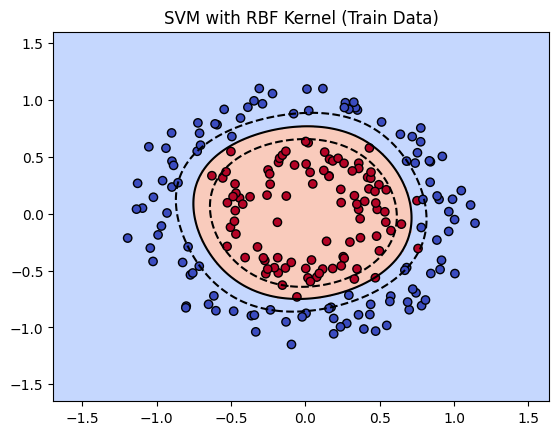

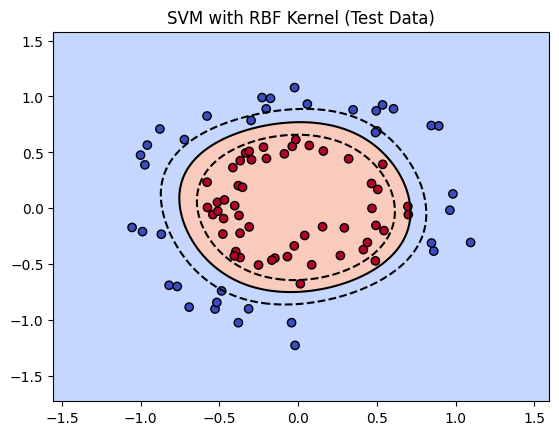

In [3]:
# Generate a non-linear dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train an SVM with RBF kernel
clf_rbf = SVC(kernel='rbf', C=10, gamma=1)  # Tuning gamma and C for complex data
clf_rbf.fit(X_train, y_train)

# Visualization function
def plot_decision_boundary(clf, X, y, title):
    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 200),
        np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 200)
    )
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z > 0, alpha=0.5, cmap='coolwarm')
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(title)
    plt.show()

# Visualize the decision boundary
plot_decision_boundary(clf_rbf, X_train, y_train, "SVM with RBF Kernel (Train Data)")
plot_decision_boundary(clf_rbf, X_test, y_test, "SVM with RBF Kernel (Test Data)")

### Experiment:
- Change `gamma` in `SVC(kernel='rbf', C=10, gamma=1)` to adjust the influence of individual data points.
- Change `C` to observe how it impacts the decision boundary.

For example:
- Try `gamma=0.1` or `gamma=5`.
- Try `C=1` or `C=100`.

See how the model handles overfitting or underfitting with these changes.

Created by Maria Musiał
